# CPU Inference Performance Analysis: Batch Size Effects

This notebook analyzes CPU-only inference performance of ResNet-18 across different batch sizes.
Metrics include latency per sample, throughput, CPU utilization, and memory usage.

Hardware: Local MacBook (CPU-only)
Framework: PyTorch


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Matplotlib is building the font cache; this may take a moment.


In [6]:
df_resnet = pd.read_csv("../results/batch_size_results.csv")
df_lstm = pd.read_csv("../results/lstm_batch_size_results.csv")

df_resnet["model"] = "ResNet-18"
df_lstm["model"] = "LSTM"

df_all = pd.concat([df_resnet, df_lstm], ignore_index=True)
df_all



,latency_ms_per_sample,throughput_samples_per_sec,cpu_usage_percent,memory_usage_mb,batch_size,model
0,111.696598,8.952824,23.7,328.937500,1,ResNet-18
1,103.869239,9.627489,18.2,421.132812,8,ResNet-18
2,106.325024,9.405124,22.3,377.609375,16,ResNet-18
3,103.021480,9.706714,16.4,567.613281,32,ResNet-18
4,7.783663,128.474223,18.6,262.113281,1,LSTM
5,7.131798,140.217087,17.7,271.960938,8,LSTM
6,6.494297,153.981245,15.8,300.769531,16,LSTM
7,6.445513,155.146698,16.1,330.117188,32,LSTM


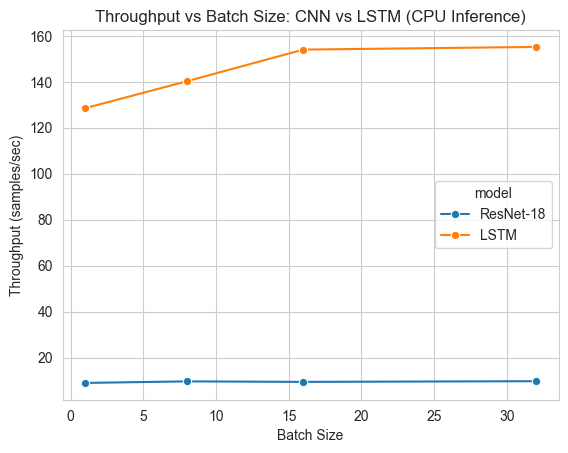

In [7]:
plt.figure()
sns.lineplot(
    data=df_all,
    x="batch_size",
    y="throughput_samples_per_sec",
    hue="model",
    marker="o"
)
plt.xlabel("Batch Size")
plt.ylabel("Throughput (samples/sec)")
plt.title("Throughput vs Batch Size: CNN vs LSTM (CPU Inference)")
plt.show()



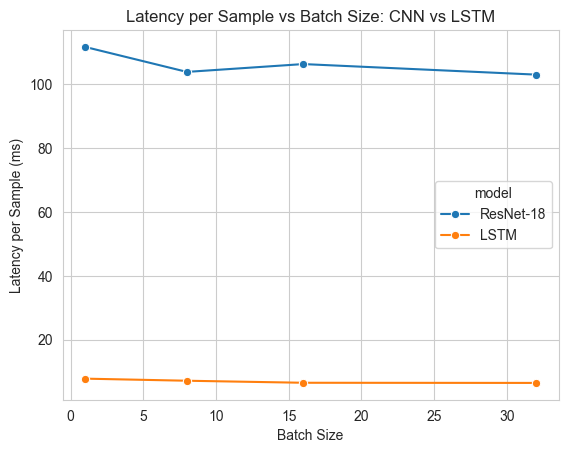

In [8]:
plt.figure()
sns.lineplot(
    data=df_all,
    x="batch_size",
    y="latency_ms_per_sample",
    hue="model",
    marker="o"
)
plt.xlabel("Batch Size")
plt.ylabel("Latency per Sample (ms)")
plt.title("Latency per Sample vs Batch Size: CNN vs LSTM")
plt.show()


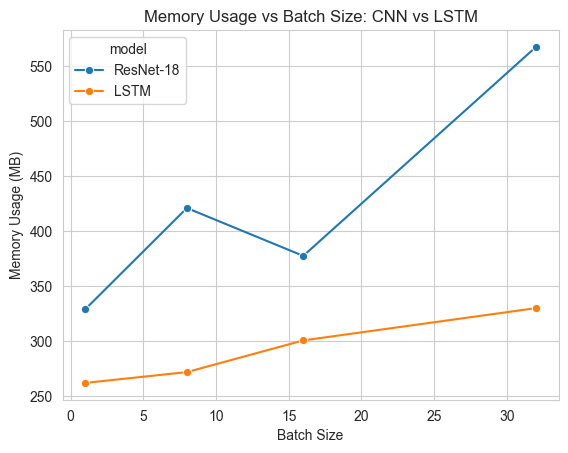

In [9]:
plt.figure()
sns.lineplot(
    data=df_all,
    x="batch_size",
    y="memory_usage_mb",
    hue="model",
    marker="o"
)
plt.xlabel("Batch Size")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage vs Batch Size: CNN vs LSTM")
plt.show()



### Key Observation

1️⃣ LSTM achieves significantly higher throughput than CNN on CPU
- Across all batch sizes, the LSTM consistently delivers much higher throughput than ResNet-18.
- This indicates that, for the chosen configuration, the LSTM’s matrix-multiplication–heavy operations are more CPU-friendly than convolutional layers.
- ResNet-18 throughput remains relatively low and flat, suggesting limited batching benefits for convolutional workloads on CPU.

📌 Insight: On CPU, certain sequence models can outperform CNNs in raw throughput due to simpler compute patterns and better cache utilization.

2️⃣ ResNet-18 exhibits substantially higher per-sample latency
- ResNet-18 shows an order of magnitude higher latency per sample compared to the LSTM.
- This reflects the deeper architecture and more complex convolutional operations in CNNs, which incur higher compute and memory access costs per input.
- LSTM latency remains low and relatively stable across batch sizes, indicating predictable CPU execution behavior.

📌 Insight: CNN inference on CPU is more latency-heavy than LSTM inference, even when batching is applied.

3️⃣ Memory usage grows much faster for CNNs than for LSTMs
- ResNet-18 shows a steep increase in memory usage as batch size increases, especially at larger batch sizes.
- LSTM memory usage increases more gradually and remains significantly lower across all batch sizes.
- This suggests CNN activations and intermediate feature maps place higher pressure on system memory.

📌 Insight: CNNs are more memory-intensive on CPU, which can limit scalability under constrained RAM conditions.

4️⃣ Batch size affects CNNs and LSTMs very differently
- CNN performance shows non-monotonic behavior with batch size, likely due to cache effects, memory allocation, and CPU scheduling.
- LSTM performance scales more smoothly with batch size, reflecting simpler execution patterns and fewer large intermediate tensors.

📌 Insight: CPU inference scaling behavior is highly architecture-dependent and cannot be generalized across model types.

5️⃣ Architectural bottlenecks dominate CPU performance characteristics
- ResNet-18 appears to be compute- and memory-bound on CPU, limiting throughput improvements from batching.
- LSTM appears to be more compute-efficient in this setup, benefiting from contiguous memory access and fewer large activation tensors.

📌 Insight: On CPU, architectural design (convolutions vs recurrent operations) has a stronger impact on inference performance than batch size alone.